In [25]:
import os
import pandas as pd

base_dir = "../../Data"
base_csv_path = os.path.join(base_dir, 'm1_imputed.csv')
assert os.path.exists(base_csv_path), f"{base_csv_path} does not exist"

df = pd.read_csv(base_csv_path)

In [26]:
mean_wl_time = df['wl_time'].mean()
print(f"Mean waiting list time: {mean_wl_time}")

df['wl_time'] = df['wl_time'].apply(lambda x: 0 if x < mean_wl_time else 1)
print(df['wl_time'].value_counts(normalize=True))

Mean waiting list time: 168.5
0    0.69
1    0.31
Name: wl_time, dtype: float64


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

X = df.drop(['wl_time'], axis=1)
y = df['wl_time']

one_hot_cols = [col for col in df.columns if df[col].nunique() == 2]
columns_to_scale = [col for col in X.columns if col not in one_hot_cols]

scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [28]:
from sklearn.model_selection import cross_val_predict

log = LogisticRegression(max_iter=1000)
f1_scores = cross_val_score(log, X, y, cv=5, scoring='f1').mean()
print(f"F1 score pre feature selection: {f1_scores}")

f1_macro_scores = cross_val_score(log, X, y, cv=5, scoring='f1_macro').mean()
print(f"F1 macro score pre feature selection: {f1_macro_scores}")

F1 score pre feature selection: 0.5728937728937729
F1 macro score pre feature selection: 0.6874236874236873


<AxesSubplot: >

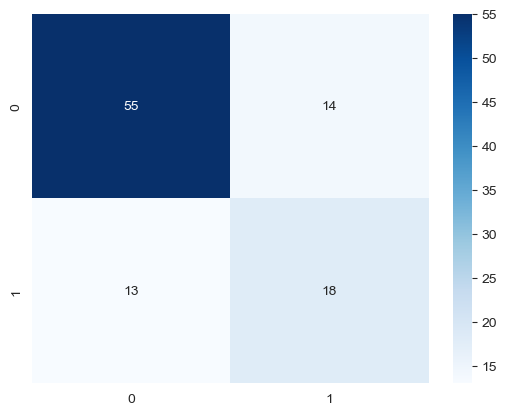

In [29]:
import seaborn as sns

y_pred = cross_val_predict(log, X, y, cv=5)
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='Blues', fmt='g')